#Code that reads text files and outputs how tc changes a function of k1 and k2 number of points



In [1]:
import numpy as np
import pandas as pd
from scipy.fft import fftn, ifftn, fftshift
import re

import matplotlib.pyplot as plt

def get_data(k1,k2):
    '''
    reads a FRG output text file
    and returns the number of k1 and k2 points used, as well as the data for all three action channels

    '''
  


    df = pd.read_csv("1NN_2_0_" + f"{k1}" +"_"+ f"{k2}" + ".txt", delimiter="\t", header = None, skiprows = 1) 

    r = df.iloc[-1, 0]
    n = r.split()

    tc, sc, mag, cdw, _ = map(float, n)

    
    if sc <= 1e-02 and  mag  <= 1e-02 and cdw <= 1e-02:  # Check if Tc is in the order of magnitude of 10^-6 or smaller
        dominant = 3

    else:
        orders = [sc, mag, cdw]
        o_max = max(orders)
        dominant = orders.index(o_max)
    
    
    return tc, sc, mag, cdw, dominant






















In [ ]:
k1 = np.arange(1, 7)
k2 = np.arange(1, 26)

Tcs = np.zeros((6, 25))
dom = np.zeros((6, 25))


X, Y = np.meshgrid(k2, k1)

for i in k1:
    for j in k2:
        
        Tcs[i-1][j-1] = get_data(i, j)[0]
        dom[i-1][j-1] = get_data(i, j)[4]



NameError: name 'nk' is not defined

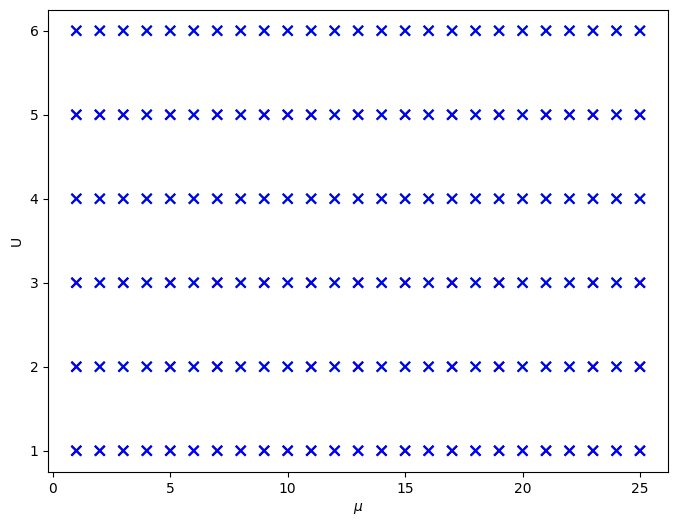

In [6]:

import numpy as np
import pandas as pd
from scipy.fft import fftn, ifftn, fftshift
import re

import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

k1 = np.arange(1, 7)
k2 = np.arange(1, 26)

Tcs = np.zeros((6, 25))
dom = np.zeros((6, 25))


X, Y = np.meshgrid(k2, k1)

for i in k1:
    for j in k2:
        
        Tcs[i-1][j-1] = get_data(i, j)[0]
        dom[i-1][j-1] = get_data(i, j)[4]


colors = ['blue', 'green', 'yellow', 'black']  
labels = ['SC', 'MAG', 'CDW', 'FL']
cmap = ListedColormap(colors)
norm = BoundaryNorm(np.arange(-0.5, 3.5, 1), cmap.N)


plt.figure(figsize=(8, 6))
scatter = plt.scatter(X, Y, c=dom, cmap=cmap, norm=norm, s=50, marker = 'x')
scatter = plt.scatter(X, Y, c=Tcs, cmap=cmap, norm=norm, s=50, marker = 'x')

plt.ylabel('U')
plt.xlabel(r'$\mu$')
plt.title(f'Fig Phase diagram as a function of U and $\mu$ for nk= {nk} and nkf= {nkf}')

legend_patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
plt.legend(handles=legend_patches, title="Phases", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()





/tmp/ipykernel_8755/4033908905.py:4: UserWarning: linewidths is ignored by contourf
  C = ax.contourf(X, Y, dom,  levels = 25, cmap = 'coolwarm', linewidths=1.5)


Text(0, 0.5, 'nk')

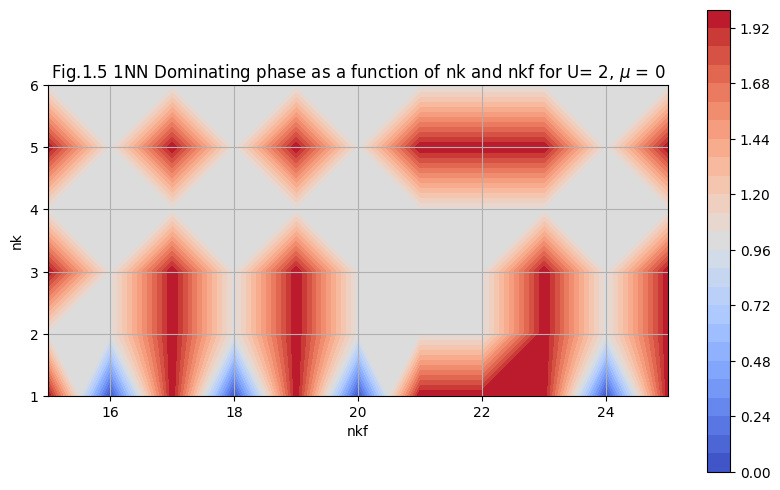

In [119]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_aspect('equal')
ax.grid()
C = ax.contourf(X, Y, dom,  levels = 25, cmap = 'coolwarm', linewidths=1.5)
fig.colorbar(C, ax=ax, orientation='vertical')

ax.set_title(f"Fig.1.5 1NN Dominating phase as a function of nk and nkf for U= 2, $\mu$ = 0")
ax.set_xlabel("nkf")
ax.set_ylabel("nk")

/tmp/ipykernel_8755/524043993.py:23: UserWarning: linewidths is ignored by contourf
  C = ax.contourf(X, Y, Tcs,  levels = 25, cmap = 'coolwarm', linewidths=1.5)


Text(0, 0.5, 'nk')

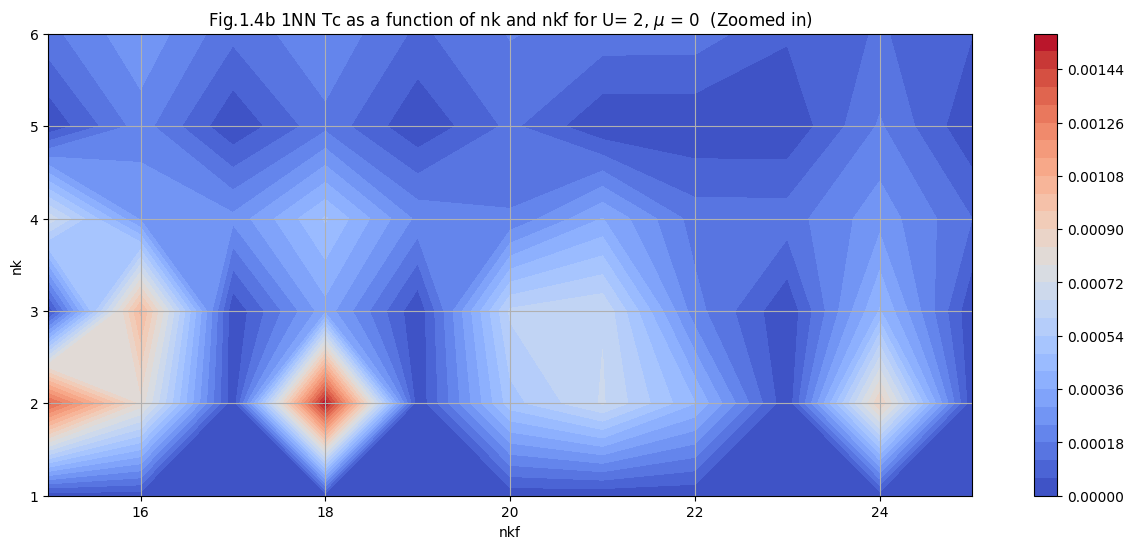

In [115]:
dom = []  # dominant phase

k1 = np.arange(1, 7)
k2 = np.arange(15, 26)
Tcs = np.zeros((6,11))
dom = np.zeros((6,11))



X, Y = np.meshgrid(k2, k1)

for i in k1:
    for j in k2:

        
        Tcs[i-1][j-15] = get_data(i, j)[0]
        dom[i-1][j-15] = get_data(i, j)[4]
      

fig, ax = plt.subplots(figsize=(16, 6))
ax.set_aspect(1)
ax.grid()
C = ax.contourf(X, Y, Tcs,  levels = 25, cmap = 'coolwarm', linewidths=1.5)
fig.colorbar(C, ax=ax, orientation='vertical')

ax.set_title(f"Fig.1.4b 1NN Tc as a function of nk and nkf for U= 2, $\mu$ = 0  (Zoomed in)")
ax.set_xlabel("nkf")
ax.set_ylabel("nk")



/tmp/ipykernel_8755/1235403449.py:4: UserWarning: linewidths is ignored by contourf
  C = ax.contourf(X, Y, dom,  levels = 25, cmap = 'coolwarm', linewidths=1.5)


Text(0, 0.5, 'nk')

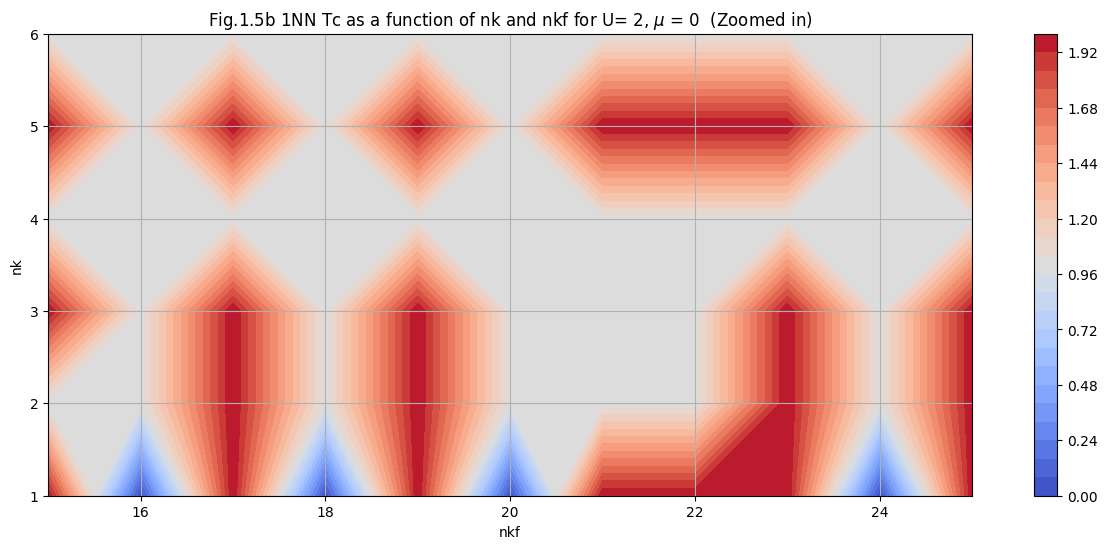

In [118]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_aspect(1)
ax.grid()
C = ax.contourf(X, Y, dom,  levels = 25, cmap = 'coolwarm', linewidths=1.5)
fig.colorbar(C, ax=ax, orientation='vertical')

ax.set_title(f"Fig.1.5b 1NN Tc as a function of nk and nkf for U= 2, $\mu$ = 0  (Zoomed in)")
ax.set_xlabel("nkf")
ax.set_ylabel("nk")
